In [36]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
from sklearn.decomposition import PCA
import george
from george import kernels
from scipy.optimize import minimize

In [50]:
import schwimmbad
import emcee
import dynesty.plotting as dyplot
import dynesty.results as dyres
import dynesty.utils as dyfunc
import dynesty
import corner
import time
import sys
from matplotlib import cm


In [56]:
fitdata=np.load("../notebooks/2d_fitdata_06.npy")
with open ('../grid_metadata/grid06_coords.txt', 'rb') as fp:
    coords = pickle.load(fp)
T_star=fitdata[:,0]
gamma=[np.log10(2.1-1*x) for x in fitdata[:,1]]
#gamma=fitdata[:,1]
w2=fitdata[:,2+2]
yerr=np.array([j*0.01 for j in w2])

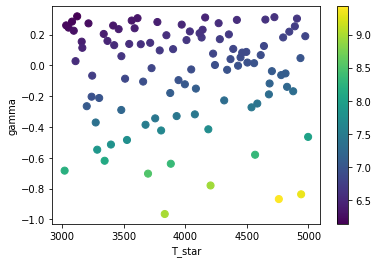

In [57]:
style = dict(cmap='viridis', vmin=np.min(w2), vmax=np.max(w2))
plt.scatter(T_star,gamma, c=w2, s=50, **style)
plt.xlabel("T_star")
plt.ylabel("gamma_trans")
plt.colorbar()
plt.show()

In [58]:
x=np.transpose(coords)
kernel = np.var(w2) * kernels.ExpSquaredKernel(2000**2,ndim=2,axes=0)* kernels.ExpSquaredKernel(0.2**2,ndim=2,axes=1)
gp = george.GP(kernel)
gp.compute(x,yerr)

np.set_printoptions(suppress=True)
print("Initial ln-likelihood: {0:.2f}".format(gp.log_likelihood(w2)))
print(gp.get_parameter_vector())
print(np.sqrt(np.exp(gp.get_parameter_vector())))

Initial ln-likelihood: -288.41
[-1.49714526 15.20180492 -3.21887582]
[   0.47304128 2000.            0.2       ]


In [69]:
np.log(1e6**2)

27.631021115928547

In [146]:
ndim = 3

def loglike (p):
    try:        
        gp.set_parameter_vector(p)
        return gp.log_likelihood(w2)
    except:
        return -100000
        

def ptform(u):
    #  [-50,50] [11,30] [-6,0.8]
    return [u[0]*100 -50, u[1]*19+11 , u[2]*7.8-6]


In [147]:
sampler = dynesty.NestedSampler(loglike, ptform, ndim,nlive=1000, pool=schwimmbad.MultiPool())

In [148]:
t0=time.time()
sampler.run_nested()
print(time.time()-t0)
results = sampler.results

iter: 8370 | +1000 | bound: 9 | nc: 1 | ncall: 49768 | eff(%): 18.827 | loglstar:   -inf < 126.054 <    inf | logz: 117.801 +/-  0.133 | dlogz:  0.001 >  1.009                                       

159.14892840385437


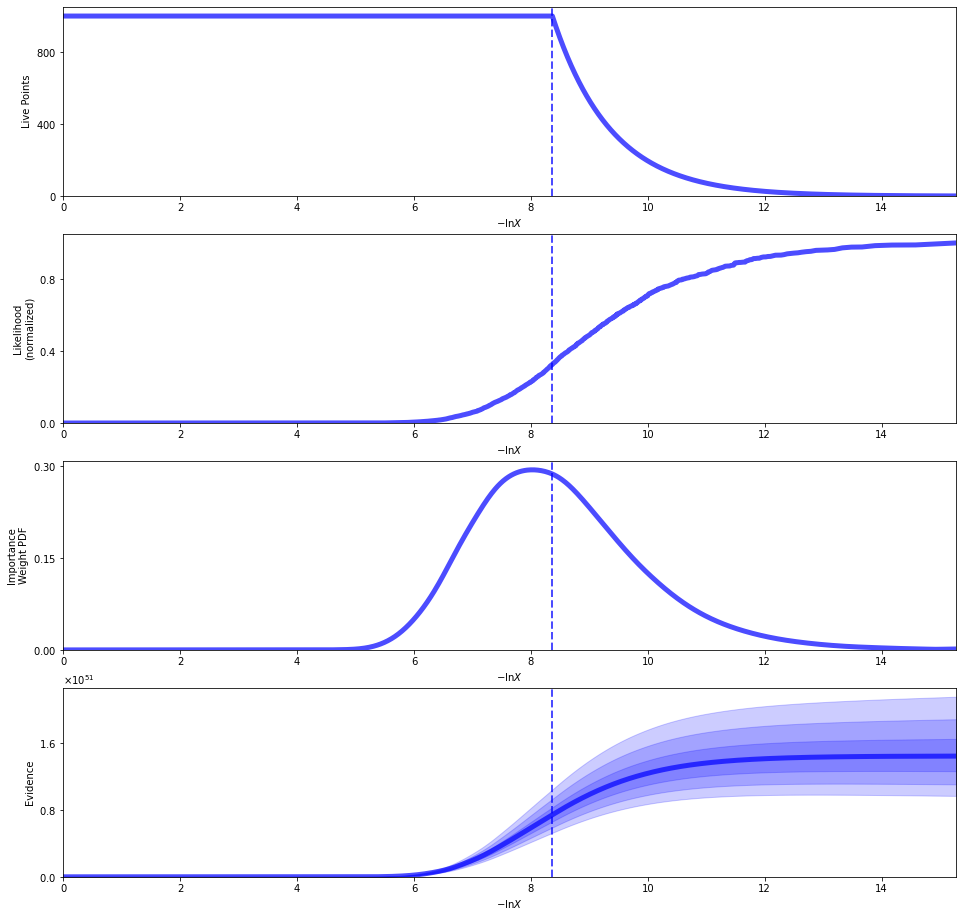

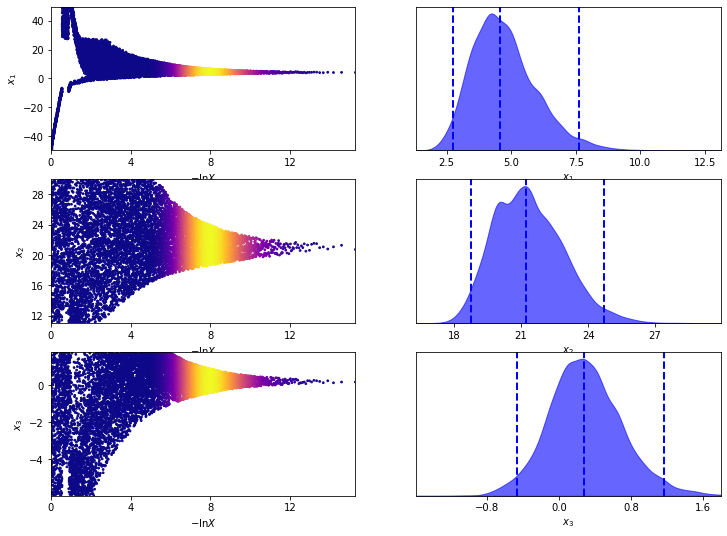

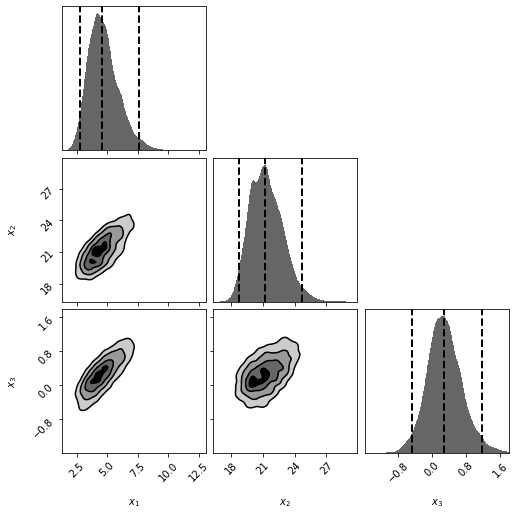

In [149]:
# Plot a summary of the run.
rfig, raxes = dyplot.runplot(results)

# Plot traces and 1-D marginalized posteriors.
tfig, taxes = dyplot.traceplot(results)

# Plot the 2-D marginalized posteriors.
cfig, caxes = dyplot.cornerplot(results)

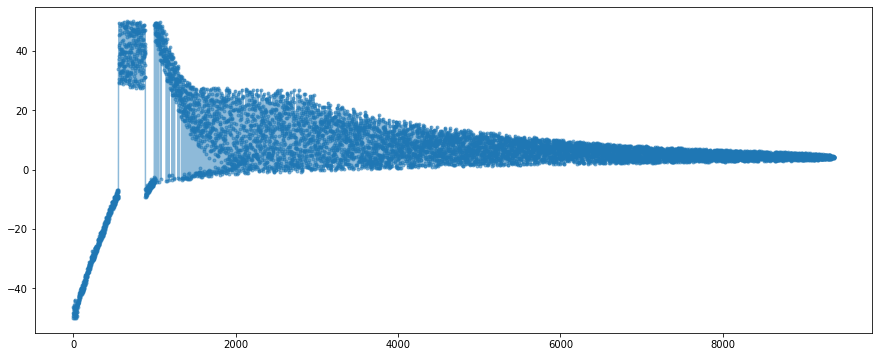

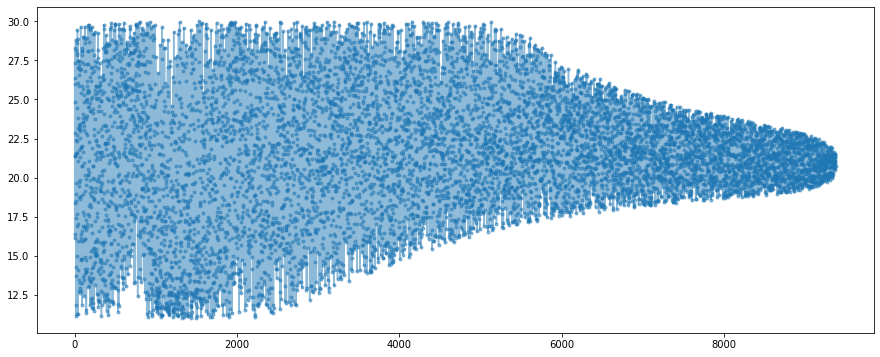

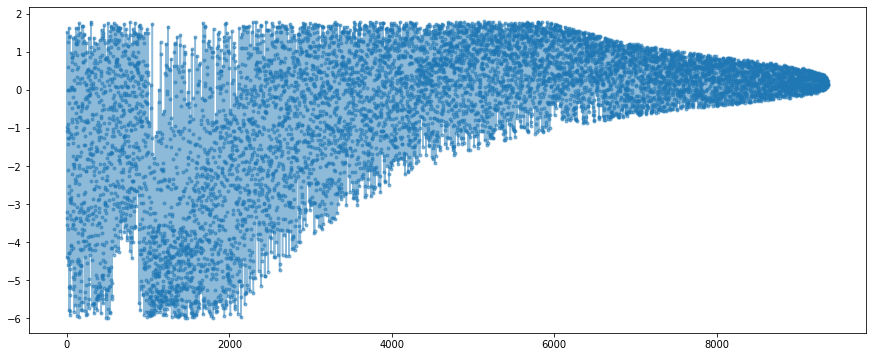

In [162]:
for i in range(3):
    cl=len(results.samples)
    plt.figure(figsize=(15,6))
    plt.plot(np.linspace(0,cl,cl),results.samples[:,i],alpha=0.5,marker=".")
    plt.show()

In [164]:
from dynesty import utils as dyfunc

samples, weights = results.samples, np.exp(results.logwt - results.logz[-1])
mean, cov = dyfunc.mean_and_cov(samples, weights)

In [1]:
mean

NameError: name 'mean' is not defined

In [165]:
new_samples = dyfunc.resample_equal(samples, weights)


In [167]:
new_samples.shape

(9370, 3)

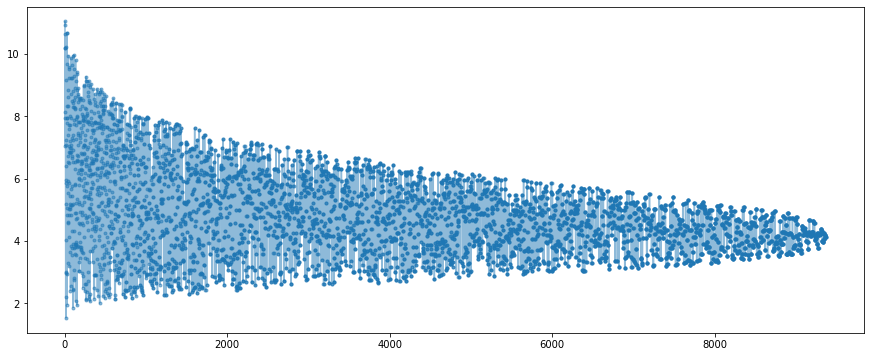

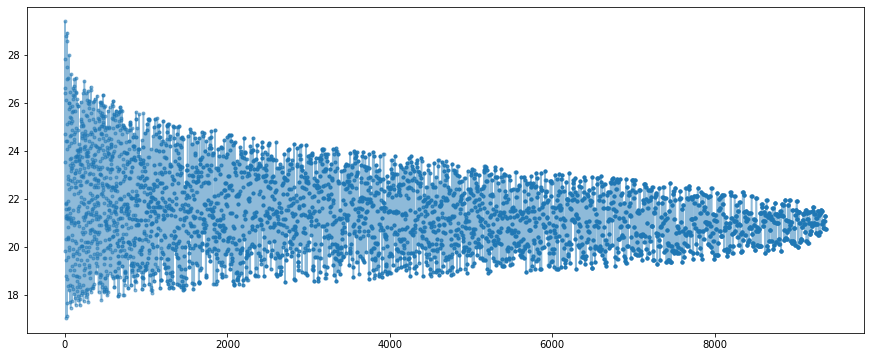

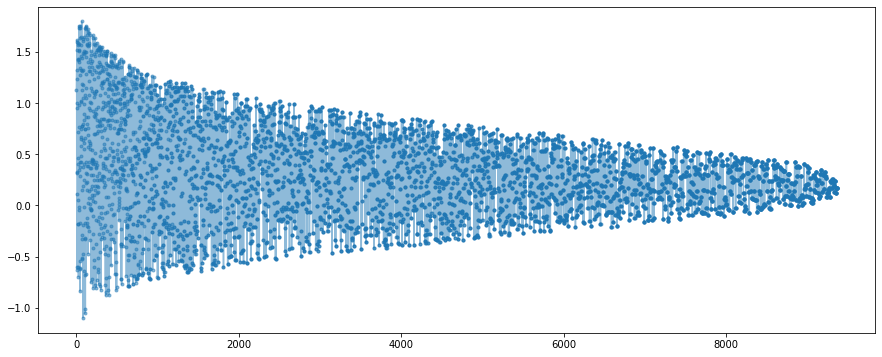

In [170]:
for i in range(3):
    cl=len(new_samples)
    plt.figure(figsize=(15,6))
    plt.plot(np.linspace(0,cl,cl),new_samples[:,i],alpha=0.5,marker=".")
    plt.show()

In [ ]:
new_samples